# Case study - Trajectory of a projectile

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import * 
init_printing(use_unicode=True)
import numpy as np 

## Objectives
* Study characteristics of the trajectory of a projectile in the ideal case of a motion in a uniform gravitational field
 ![](./trajectory_of_projectile.png)

## 1. Equation of the trajectory

In the ideal case of a motion in a uniform gravitational field, in the absence of other forces (such as air drag), the trajectory of a projectile is described by a parabola given by:

eq(1) :$$ z(x) = -\frac{1}{2}g\frac{x^2}{v^{2}_{0} \cos^2 \alpha} + x\tan \alpha + h $$  

where $g$ is the acceleration of gravity (9.81 $ms^{−2}$ ), $v_{0}$ is the initial velocity of the projectile, $\alpha$ is the angle of elevation and $h$ is the initial altitude from which the projectile is thrown.





* Q1.1 - Create a function that represents equation (1).

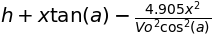

In [16]:
g, x, Vo, a, h = symbols('g, x, Vo, a , h', positive=True)
g = 9.81
z = (-g*x**2/(2*(Vo**2)*(cos(a)*cos(a))))+ x*tan(a)+h
z


* Q 1.2 - Plot the trajectory for the following set of parameters
    * $h = 1.70m$
    * $\alpha = 40^{\circ}$
    * $ v_{0} = 8 ms^{−1}$

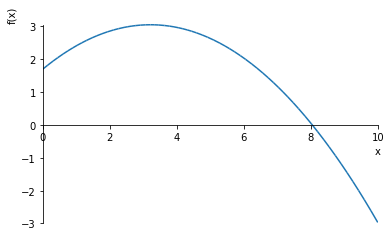

In [17]:
z1 = z.subs({a:np.deg2rad(40), h:1.70,Vo:8})
plot(z1, (x, 0, 10))

* Q 1.3 - On the same graph, plot several trajectories of projectile launched at different elevation angles but with the same speed v0 = 8ms−1 and the same initial altitude h = 1.70m.

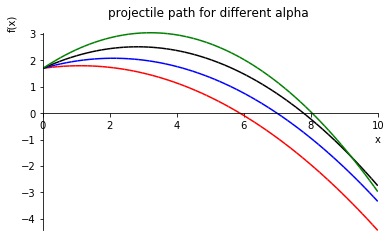

In [18]:
r = [10, 20, 30, 40]
r = np.deg2rad(r)
zr = z.subs({g:9.81, Vo:8, h:1.7})
z2 = [zr.subs({a:b}) for b in r]
p = plot(*z2, (x, 0,  10), show=False, title = 'projectile path for different alpha ')
p[0].line_color = 'r' 
p[1].line_color = 'b'
p[2].line_color = 'k'
p[3].line_color = 'g'

p.show()

## 2. Trajectory analysis


* Q 2.1 - Determine a function $f_h(\alpha, v_0 , h)$ that returns the greatest parabolic height a object reaches within its trajectory.



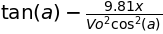

In [19]:
z.diff(x)

In [20]:
z_h = solveset(z.diff(x), x)
z_h

* Q 2.2 - Determine a function $f_R(\alpha, v_0, h)$ that gives the range defined by the greatest distance aobject travels
along the x axis.

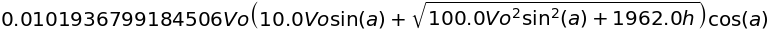

In [21]:
s = solve(z, x, domain=S.Reals)
s

z_R = s[1]
z_R

* Q 2.3 - Illustrate with a graphic that an optimal value of $\alpha$ provides the highest range.



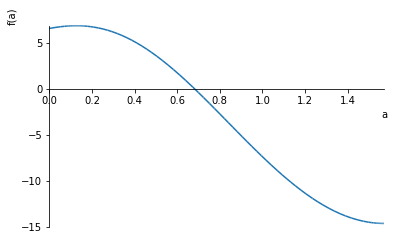

In [22]:
g_R = diff(z_R, a)
plot(g_R.subs({Vo:8, h:1.7}), (a, 0, pi/2))

* Q 2.4 - Try to find a symbolic solution of $\alpha$ optimum . Give an numeric solution for the set of parameters defined in section 1.


In [23]:
alpha_optimum = solve(g_R.subs({Vo:8, h:1.7}), a)
print('alpha in radian ', alpha_optimum[0])
print('alpha in degree' , np.rad2deg(float(alpha_optimum[0])))

alpha in radian  0.681290966881072
alpha in degree 39.0350970227



* Q 2.5 - In the specific case where $h$ = 0, give an algebraic solution of $\alpha$ optimum .

In [24]:
ha = solve(g_R.subs({h:0}), a)
ha

## 3. Starting from scratch


Consider a particle of mass $m$, the Newton second law states:
$$F = ma$$
where $F$ and $a$ represent respectively the sum of forces and the acceleration of the projectile. 
Since we only consider the ideal case with $F = m\overrightarrow{g} = −mg\overrightarrow{z}$. 
Therefore, if we only consider the trajectory of in the plane $O\overrightarrow{x}\overrightarrow{z}$


we can write the coordinate of the mobile $M$ according to $\overrightarrow{OM}= 
\begin{pmatrix} 
  x \\
  z 
\end{pmatrix}$

eq(2):
$$\begin{pmatrix} 
  0 \\
  -g 
\end{pmatrix} = \frac{d^2 \overrightarrow{OM}}{dt^2} = 
\begin{pmatrix} 
  \frac{d^2 x}{dt^2} \\
  \frac{d^2 z}{dt^2}
\end{pmatrix}$$

* Q 3.1 - By integrating equation (2) and using correct initial constant, compute the two equations $x(t)$ and $z(t)$.


In [25]:
t = symbols('t')
x = Function('x')
z = Function('z')
eqx = Eq(x(t).diff(t, 2))
eqz = Eq(z(t).diff(t, 2), -g)
e = dsolve(eqz, z(t))

C1, C2 = symbols('C1, C2')
e.subs({C1:h, C2:Vo})

In [26]:
x0 = symbols('x0')
s = dsolve(eqx, x(t))
s.subs({C1:x0, C2:Vo})

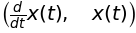

In [27]:
eqx1 = integrate(x(t).diff(t, 2), t)
eqx2 = integrate(eqx1, t)
eqx1, eqx2

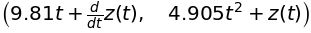

In [28]:
eqz1 = integrate(z(t).diff(t, 2)+g, t)
eqz2 = integrate(eqz1, t)
eqz1, eqz2